In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/Loan Eligibility Prediction.csv")

In [3]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [7]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
df['Gender'].value_counts()

Male      499
Female    115
Name: Gender, dtype: int64

In [9]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [10]:
df.replace({'Married':{'No':0,'Yes':1}},inplace=True)

In [18]:
df.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

In [12]:
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

In [13]:
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [14]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [19]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,1,0,0,1,0,2378,0.0,9,360,1,2,0
1,15,0,1,2,1,0,1299,1086.0,17,120,1,2,1
2,95,0,0,0,0,0,3620,0.0,25,120,1,1,1
3,134,0,1,0,1,1,3459,0.0,25,120,1,1,1
4,556,0,1,1,1,0,5468,1032.0,26,360,1,1,1


In [21]:
y=df['Loan_Status']

In [22]:
y.shape

(614,)

In [23]:
x=df.drop(['Loan_Status','Customer_ID'],axis=1)

In [24]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [26]:
X_std=x[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', ]]

In [27]:
x[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount','Loan_Amount_Term', ]]=pd.DataFrame(X_std,columns=['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount','Loan_Amount_Term', ])

In [28]:
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,2
1,0,1,2,1,0,1299,1086.0,17,120,1,2
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,2947,1603.0,10,360,1,2
610,0,0,0,1,0,4680,2087.0,15,360,1,1
611,0,1,2,1,1,6633,0.0,25,360,0,0
612,0,1,1,0,0,2492,2375.0,30,360,1,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.3,random_state=252)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier(random_state=2539,max_depth=3)

In [35]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=2539)

In [36]:
y_pred=dt.predict(X_test)

In [37]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [38]:
dt.predict_proba(X_test)

array([[0.87692308, 0.12307692],
       [0.17374517, 0.82625483],
       [0.17374517, 0.82625483],
       [0.2826087 , 0.7173913 ],
       [0.17374517, 0.82625483],
       [0.17374517, 0.82625483],
       [0.87692308, 0.12307692],
       [0.2826087 , 0.7173913 ],
       [1.        , 0.        ],
       [0.17374517, 0.82625483],
       [0.87692308, 0.12307692],
       [0.17374517, 0.82625483],
       [0.17374517, 0.82625483],
       [0.2826087 , 0.7173913 ],
       [0.17374517, 0.82625483],
       [0.87692308, 0.12307692],
       [0.17374517, 0.82625483],
       [0.2826087 , 0.7173913 ],
       [0.87692308, 0.12307692],
       [0.2826087 , 0.7173913 ],
       [0.17374517, 0.82625483],
       [0.87692308, 0.12307692],
       [0.87692308, 0.12307692],
       [0.2826087 , 0.7173913 ],
       [0.17374517, 0.82625483],
       [0.87692308, 0.12307692],
       [0.2826087 , 0.7173913 ],
       [0.2826087 , 0.7173913 ],
       [0.2826087 , 0.7173913 ],
       [0.17374517, 0.82625483],
       [0.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65        56
           1       0.82      0.98      0.89       129

    accuracy                           0.84       185
   macro avg       0.88      0.74      0.77       185
weighted avg       0.85      0.84      0.82       185



In [42]:
print(confusion_matrix(Y_test,y_pred))

[[ 28  28]
 [  2 127]]


In [43]:
from sklearn.tree import plot_tree

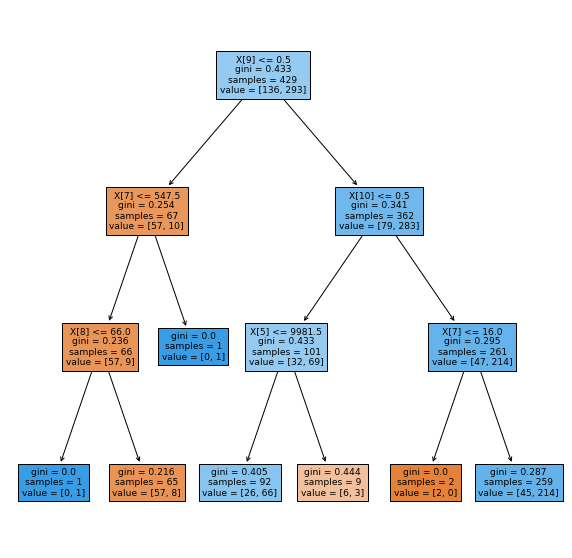

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True)
plt.show()

In [45]:
X_new=x.sample(1)

In [46]:
X_new

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
374,1,1,0,1,0,3667,1459.0,144,360,1,1


In [47]:
dt.predict(X_new)

array([1])

In [49]:
df.iloc[434:435,:13]

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
434,471,0,1,1,1,1,3450,2079.0,162,360,1,1,1
